In [1]:
file = open("word2vec_easy_segment_corpus.txt")
data = file.readlines()
file.close()
# data = data[:10]

In [2]:
size = len(data)
size

107

### tokenise, remove stop words 

In [3]:
stopwords = [
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself",
    "it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are",
    "was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until",
    "while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down",
    "in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more",
    "most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now","d",
    "ll","m","o","re","ve","y","ain","aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan","shouldn","wasn","weren","won","wouldn"
]

for i in range(size):
    data[i] = data[i].replace("\n", "")
    
filtered_data = []
for i in range(size):
    tokens = []
    for word in data[i].split(" "):
        if word.lower() not in stopwords:
            tokens.append(word.lower())
        
    filtered_data.append(tokens)
            
filtered_data[:2]

[['car', 'drove', 'road'], ['automobile', 'drove', 'road']]

### Ngrams

In [4]:
def create_ngrams(sentence, window):
    sentence_size = len(sentence)
    ngrams = [] 
    for i in range(sentence_size-window - 1):
        ngrams.append([sentence[i: i+window],sentence[i+window+1]])
    #     ngrams[i][1] = [sentence[i+window+1]]
        
    return ngrams

ngrams_text = []
for i in filtered_data:
    
    ngrams_text.extend(create_ngrams(i, 1))
    
ngrams_text[0]

[['car'], 'road']

### Unique vocab and one hot encode

In [5]:
vocab = []
# filtered_data = filtered_data.extent()
for i in filtered_data:
    if i not in vocab :
        vocab.extend(i)
vocab_size = len(vocab)
vocab[:3], vocab_size

(['car', 'drove', 'road'], 429)

In [6]:
import numpy as np
onehot_encodes = np.array([[0]* vocab_size] * vocab_size)
onehot_encodes_map = {}
for i in range(vocab_size):
    onehot_encodes[i][i] = 1
    onehot_encodes_map[vocab[i]] = onehot_encodes[i]
# onehot_encodes_map

### create train data

In [7]:
ngrams_text[2]

[['vehicle'], 'road']

In [8]:
X = []
y = []
for i in ngrams_text:
    x_sub = []
    for x in i[0]:
        x_sub.extend(onehot_encodes_map[x])
    X.append(x_sub)
    y.append(onehot_encodes_map[i[1]])
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((215, 429), (215, 429))

In [9]:
### model training

In [10]:
from NN_class import NeuralNetwork

In [11]:
input_shape = X.shape[1]
output_shape = y.shape[1]
hidden_layers = 2

model = NeuralNetwork(input_shape,output_shape,hidden_layers)
model.train(X, y, epoch = 1000, learning_rate = 0.001, batch_size = 128, optimiser = "momentum")

 At the end Epoch :  0  Loss :  6.072261266750722


In [12]:
weights = model.params['W1']
x_test = []
for i in range(len(vocab)):
    x_test.append([vocab[i], weights[i]])
    # break

In [13]:
x_test[0]

['car', array([0.01823681, 0.03822976])]

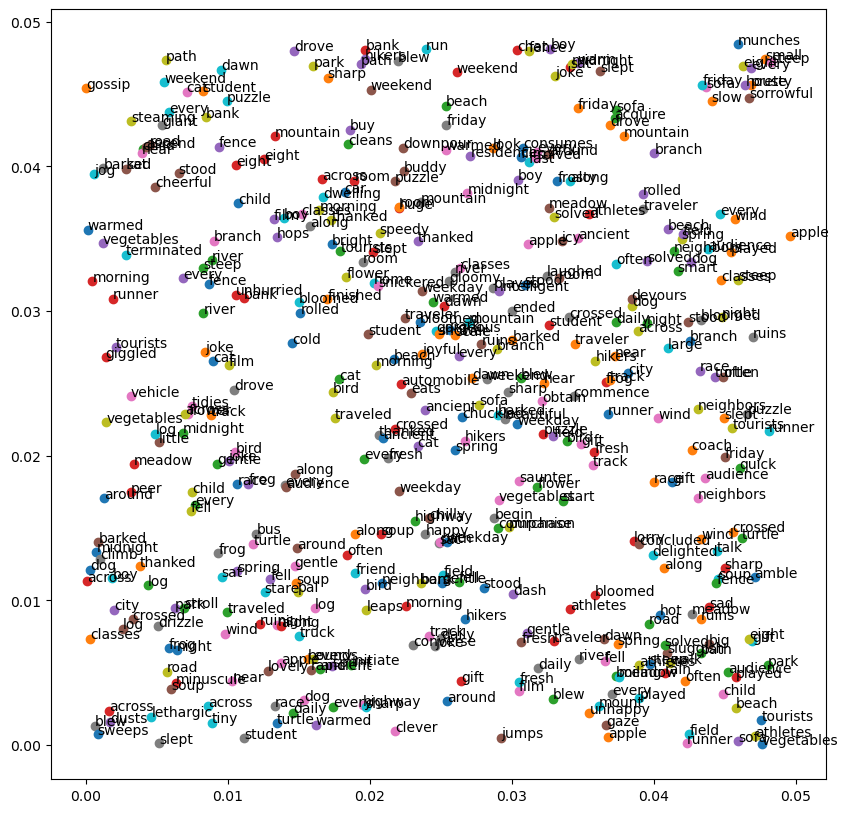

In [14]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(10, 10))


for i in x_test:
    # if i[1][0]<=1 and i[1][0]>=0.2 and i[1][1] >=0.2 and i[1][1] <= 1 :
    if i[1][0]>=0 and i[1][0]<=0.5:
        plt.scatter(i[1][0], i[1][1])
        plt.annotate(i[0], (i[1][0], i[1][1]))

plt.show()
    

In [15]:
from keras.layers import Dense, Input
from keras.models import Sequential

model = Sequential()
model.add(Input(shape = ( input_shape,)))
model.add(Dense(2 , activation = 'linear'))
model.add(Dense(output_shape, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = 'accuracy')
model.fit(X, y, epochs = 500)

Epoch 1/500
7/7 [==============================] - 0s 3ms/step - loss: 6.0595 - accuracy: 0.0233
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 6.0487 - accuracy: 0.0326
Epoch 3/500
7/7 [==============================] - 0s 1ms/step - loss: 6.0380 - accuracy: 0.0372
Epoch 4/500
7/7 [==============================] - 0s 1ms/step - loss: 6.0273 - accuracy: 0.0326
Epoch 5/500
7/7 [==============================] - 0s 1ms/step - loss: 6.0164 - accuracy: 0.0326
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 6.0052 - accuracy: 0.0419
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 5.9937 - accuracy: 0.0372
Epoch 8/500
7/7 [==============================] - 0s 1ms/step - loss: 5.9817 - accuracy: 0.0465
Epoch 9/500
7/7 [==============================] - 0s 961us/step - loss: 5.9691 - accuracy: 0.0512
Epoch 10/500
7/7 [==============================] - 0s 823us/step - loss: 5.9558 - accuracy: 0.0512
Epoch 11/500
7/7 [=======

In [16]:

weights = np.array(model.weights[0])
x_test = []
for i in range(len(vocab)):
    x_test.append([vocab[i], weights[i]])
    # break

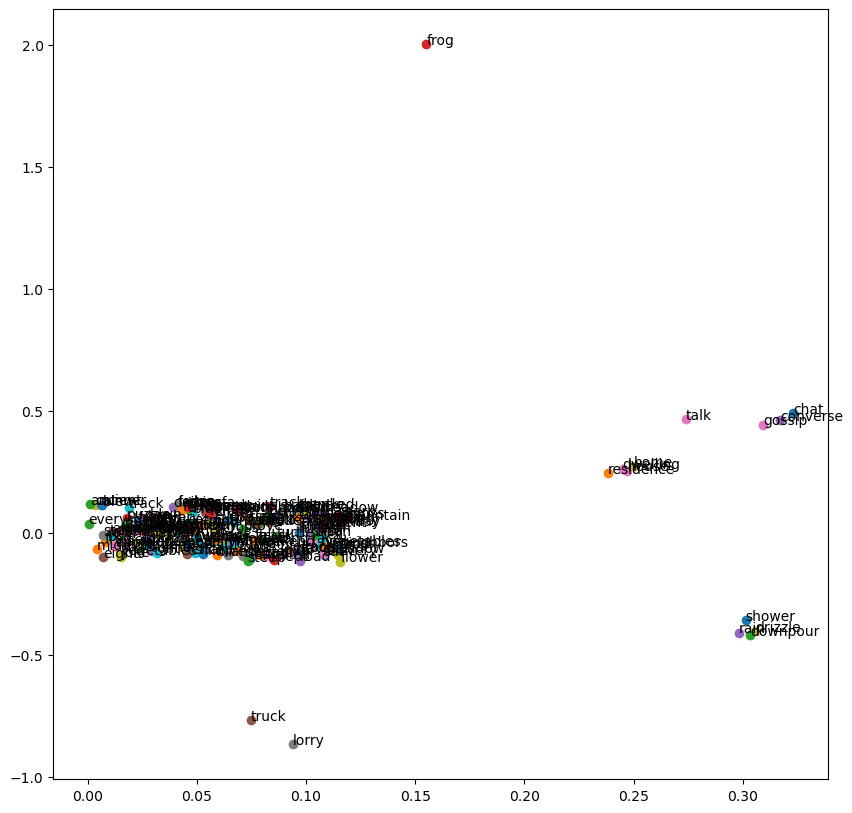

In [17]:
for i in x_test:
    # if i[1][0]<=1 and i[1][0]>=0.2 and i[1][1] >=0.2 and i[1][1] <= 1 :
    if i[1][0]>=0 and i[1][0]<=0.5:
        plt.scatter(i[1][0], i[1][1])
        plt.annotate(i[0], (i[1][0], i[1][1]))

plt.show()